###Segmenting Image using K-Mean *Clustering*

K-mean clusterig is not only used to cluster data point. It can be used to segment images. In this notebook project, it is shown how K-mean clusttering can segment images. K-means algorithm has implemented from scratch, the goal of this project is not only learning how K-mean clustering segment images, but also learn how the K-mean clustering works

In [23]:
# Import necessary library
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [24]:
### Randomly initialize the centroid by sampling from given data point
def initialize_centroid(x,k):
  index = np.random.randint(0,x.shape[0],k)
  return x[index]


### this function updates the centroid.
### At each iteration, The data points assigned to the centroid is averaged
### and updates the centroid.
def update_centroid(x,centroid,label):
  
  for i in range(centroid.shape[0]):
    if x[label==i].shape[0] != 0:
      average = np.sum(x[label==i],axis=0)/x[label==i].shape[0]
      centroid[i,:]=average
  return centroid

### After updating the centroid, we again determine which data point belongs to which cluster.....
def update_label(x,centroid):
  '''
  The label is updated as followed:
  1. Determine the Eclidean distance for each data points from each cluster
  2. Assign each data points to the centroid which has minimum distance 
    and store the assigned centroid number to the label
  '''
  new_label=np.zeros(x.shape[0])
  for i,j in enumerate(x,0):
    distance = np.linalg.norm(j-centroid,axis=1)
    new_label[i]= np.argmin(distance)
  return new_label.astype(dtype=int)

### Here 'x' is the data set we want to cluster, 'k' is the number of cluster,
### And 'it' is the number of iteration. In practical we want to define how many time we want to update 
def fit(x,k,iteration=5):
  '''
  This is the main loops where the clustering is happening.
  Before the iteration starts:
  1. initialize the centroid
  2. assign the data points to centroid.

  One step of iteration is as followed:
  1. Update the centroid
  2. Assign the data points to updated centroid

  After the iteration has finished, return the centroid 
  and the label which determines which data point belongs to which centroid or cluster.
  '''
  centroids = initialize_centroid(x,k)
  labels = update_label(x,centroids)
  for i in range(iteration):
    new_centroids = update_centroid(x,centroids,labels)
    centroids=new_centroids
    labels = update_label(x,centroids)
  return centroids,labels

In [25]:
### Preprocessing the image

def preprocess_image(image_url,resize_shape):
  '''
  The image is preprocessed (Normalized, reshaped) and flatten the image matrix to (-1,3)
  '''
  image = cv2.imread(image_url)
  image = cv2.resize(image,resize_shape, interpolation = cv2.INTER_NEAREST)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  original_shape= image.shape
  image = image/255
  return np.reshape(image,(-1,image.shape[-1]))

In [26]:
# Add your own image path
image_url = '/content/car_image.jpeg'
resized_shape = (256,256)
image = preprocess_image(image_url,resized_shape)

### Choose the cluster size. Play with different cluster size and see the magic
cluster_size=4
iter=20
### After training get the centroid and labels... 
centroids,labels = fit(image,cluster_size,iter)

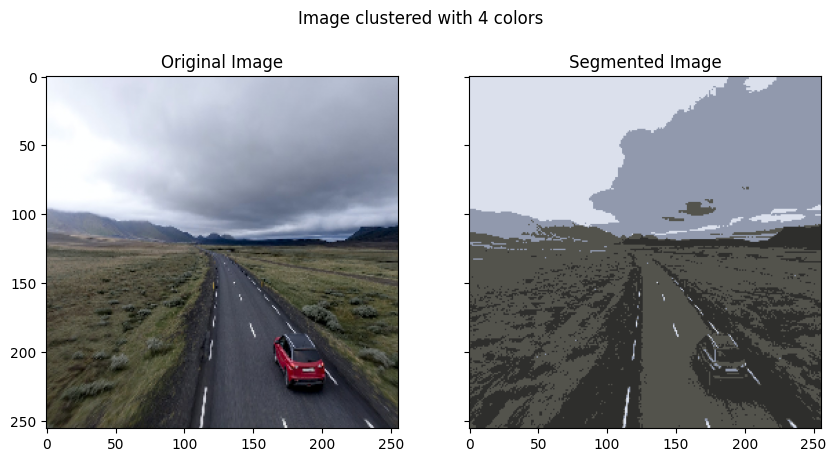

In [31]:
### retrieve the image from centroid and labels... 
segmented_image = centroids[labels]
### Convert again to 3 dimensional array of pixel value... 
segmented_image = segmented_image.reshape((resized_shape[0],resized_shape[1],3))
image = np.reshape(image,(resized_shape[0],resized_shape[1],3))

### Function to plot the original image and segmented image
def plot_image(original_image,segmented_image):
  fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
  fig.suptitle(f"Image clustered with {cluster_size} colors")
  ax1.set_title("Original Image")
  ax2.set_title("Segmented Image")
  ax1.imshow(original_image)
  ax2.imshow(segmented_image)
  fig.set_size_inches(10, 5)
  fig.show()

# show the images
plot_image(image,segmented_image)